# Tutorial

In this tutorial, we will walk through some examples of using the convenient `run()` method that runs the tests in the `tests/` folder.  These tests are designed to identify compatibility and data quality issues. Note that this tutorial does not cover how to submit Issues to the RAMIP GitHub -- please refer to the README for guidance on that. However, this tool can support you in identifying and understanding potential Issues that could be submitted.

After downloading RAMIP data, it’s a good idea to examine the data and run checks to catch any major issues before starting your analysis. With a single `run()` call, you can pass in multiple data files and check if all of those files are compatible (e.g., all having the same spatial coordinates) and if they have any obvious data issues (like duplicate timesteps). By calling `run()` on a single data file, it displays several graphs that given an overview of the data. 

First, we import the methods we will use to run checks. 

In [6]:
from tests.run_tests import run, check_model

Let's run a standard check between two netCDFs to see what output it gives us! We will compare two precipitation netCDFs from NorESM2. 

In [7]:
path1 = "/home/persad_research/SIMULATION_DATA/DATA/RAMIP/NorESM2-LM/ssp126/r1i1p1f1/atm/day/pr/pr_day_NorESM2-LM_ssp126_r1i1p1f1_gn_20510101-20601231.nc"
path2 = "/home/persad_research/SIMULATION_DATA/DATA/RAMIP/NorESM2-LM/ssp126/r1i1p1f1/atm/day/pr/pr_day_NorESM2-LM_ssp126_r1i1p1f1_gn_20210101-20301231.nc"

run([path1, path2])



SUMMARY: 5/5 checks passed.
Monotonic Check passed: Time coordinates are strictly increasing.

Calendar Check passed: Time coordinates use the same calendar across all datasets.

Units Check passed: Units are equivalent across all datasets.

Var Name Check passed: Variables have the same name across all datasets.

Spatial Coord Check passed: Spatial coordinates are equivalent across all datasets.




We can see that all of checks pass and see all of the checks that have been implemented so far! This indicates that as far as the tool can tell, these netCDFs don't have any obvious data issues and are safe to combine or compare. We also can observe that not all checks are relevant for every scenario. 

In this next example, we will compare a NorESM2 file that contains precipitation data with a NorESM2 file that contains humidity data. It doesn't make sense to check if the variables have the same name, so we set the parameter `check_variable_name` to be `False`. We do the same with `check_units`. We can see that the files are still compatible in the other ways. 

In [3]:
# Note that while all of the paths given in this tutorial are netCDFs, the function can also handle the ZARR file format. 
path1 = "/home/persad_research/SIMULATION_DATA/DATA/RAMIP/NorESM2-LM/ssp126/r1i1p1f1/atm/day/pr/pr_day_NorESM2-LM_ssp126_r1i1p1f1_gn_20510101-20601231.nc"
path2 = "/home/persad_research/SIMULATION_DATA/DATA/RAMIP/NorESM2-LM/ssp126/r1i1p1f1/atm/day/hurs/hurs_day_NorESM2-LM_ssp126_r1i1p1f1_gn_20310101-20401231.nc"

run([path1, path2], check_units=False, check_variable_name=False)



SUMMARY: 3/3 checks passed.
Monotonic Check passed: Time coordinates are strictly increasing.

Calendar Check passed: Time coordinates use the same calendar across all datasets.

Spatial Coord Check passed: Spatial coordinates are equivalent across all datasets.




## Failed Check Example 

This next example checks CESM2 precipitation files across different experiments. We notice that the spatial coordinates of ssp370-LE have issues. In the next code block, we can call `run()` with `verbose=True` to get more information on the issue. 

In [4]:
path = "/home/persad_research/SIMULATION_DATA/DATA/RAMIP/CESM2/"
path1 = path + "ssp370/r1i1p1f1/atm/day/pr/pr_day_CESM2_ssp370-LE_r1i1p1f1_gn_20150101-21010101.nc"
path2 = path + "ssp370-126aer/r1i1p1f1/atm/day/pr/pr_day_CESM2_ssp370-126aer_r1i1p1f1_gn_20150101-20791231.nc"
path3 = path + "ssp370-afr126aer/r1i1p1f1/atm/day/pr/pr_day_CESM2_ssp370-AFR126aer_r1i1p1f1_gn_20150101-20791231.nc"
path4 = path + "ssp370-eas126aer/r1i1p1f1/atm/day/pr/pr_day_CESM2_ssp370-EAS126aer_r1i1p1f1_gn_20150101-20791231.nc"
path5 = path + "ssp370-nae126aer/r1i1p1f1/atm/day/pr/pr_day_CESM2_ssp370-NAE126aer_r1i1p1f1_gn_20150101-20791231.nc"

run([path1, path2, path3, path4, path5])



SUMMARY: 4/5 checks passed.
Monotonic Check passed: Time coordinates are strictly increasing.

Calendar Check passed: Time coordinates use the same calendar across all datasets.

Units Check passed: Units are equivalent across all datasets.

Var Name Check passed: Variables have the same name across all datasets.

Spatial Coord Check failed: Spatial coordinates are not equivalent across all datasets. The following datasets (1/5) are different from the majority opinion: ['pr_day_CESM2_ssp370-LE_r1i1p1f1_gn_20150101-21010101.nc']


If you would like more information on why the checks failed, run the function with the verbose flag set to True. To avoid this output becoming too long, we would recommend running the function with just two files at a time.


## Verbose Flag

With the verbose flag set to True, we can gain more insight into the issue. The latitude coordinates in the ssp370-LE experiment have similar coordinates to the majority opinion, but there is a precision issue. This helpful error output appears for all failed checks when the verbose flag is True. 

In [5]:
run([path1, path2, path3, path4, path5], True)

Checking 5 datasets: ['pr_day_CESM2_ssp370-LE_r1i1p1f1_gn_20150101-21010101.nc', 'pr_day_CESM2_ssp370-126aer_r1i1p1f1_gn_20150101-20791231.nc', 'pr_day_CESM2_ssp370-AFR126aer_r1i1p1f1_gn_20150101-20791231.nc', 'pr_day_CESM2_ssp370-EAS126aer_r1i1p1f1_gn_20150101-20791231.nc', 'pr_day_CESM2_ssp370-NAE126aer_r1i1p1f1_gn_20150101-20791231.nc']


Spatial Coordinates Err Output: 
Comparing pr_day_CESM2_ssp370-AFR126aer_r1i1p1f1_gn_20150101-20791231.nc and pr_day_CESM2_ssp370-LE_r1i1p1f1_gn_20150101-21010101.nc
The lat dimension does not have the same values. (It's possible that more dimensions also do not have the same values.) Here are the first 10 values that are different: 
-71.15183246073298 != -71.15183246073299 (index 20)
-69.26701570680629 != -69.26701570680628 (index 22)
-60.78534031413612 != -60.78534031413613 (index 31)
-31.57068062827225 != -31.570680628272253 (index 62)
-27.80104712041885 != -27.801047120418847 (index 66)
-26.8586387434555 != -26.858638743455497 (index 67)
-25.91

One use case may be checking within all of the downloaded data for a specific model to check compatability. Within a model's outputs, there will be different variables, so we can use `check_model` that contains only the checks that make sense for checking within a model. 

In [6]:
import os

# get ALL of the files under the path directory, including files in subdirectories
path = '/home/persad_research/SIMULATION_DATA/DATA/RAMIP/NorESM2-LM'
netcdfs = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".nc"):
            netcdfs.append(os.path.join(root, file))
print(f"We are checking {len(netcdfs)} files.")


check_model(netcdfs)

We are checking 300 files.




SUMMARY: 3/3 checks passed.
Monotonic Check passed: Time coordinates are strictly increasing.

Calendar Check passed: Time coordinates use the same calendar across all datasets.

Spatial Coord Check passed: Spatial coordinates are equivalent across all datasets.




# Single Data File

We can get a sense for our data at a glance by calling `run()` on a single data file. 

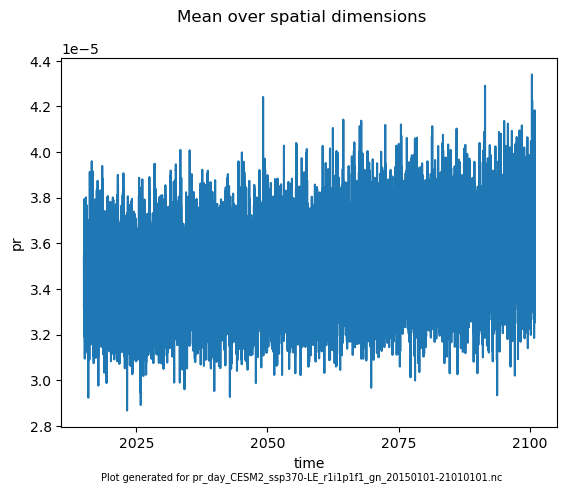

Not enough dimensions for a color mesh plot.


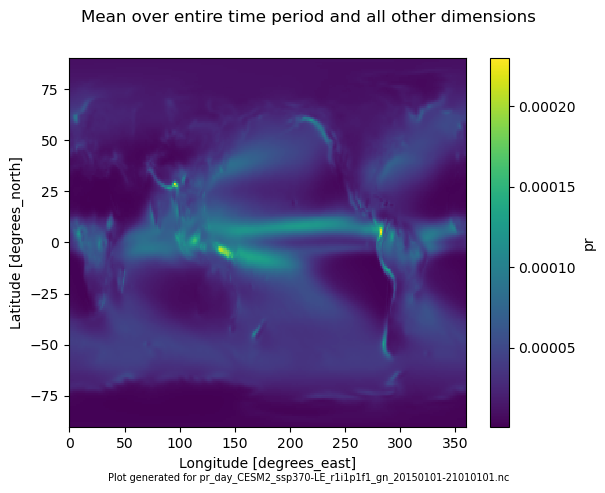

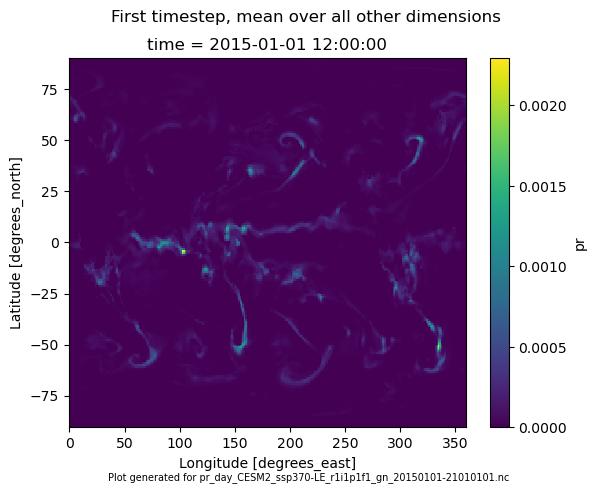

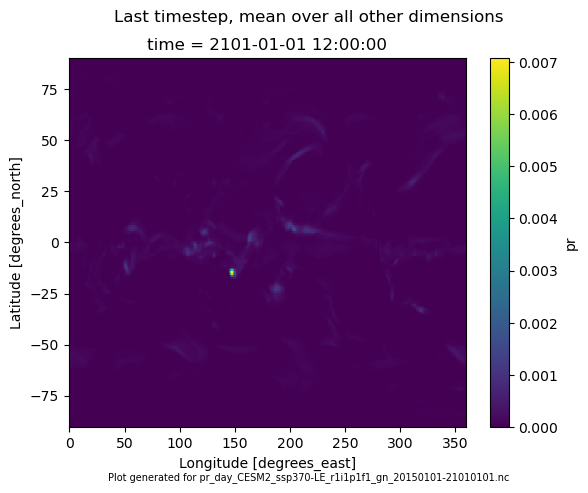

In [7]:
path = '/home/persad_research/SIMULATION_DATA/DATA/RAMIP/CESM2/ssp370/r1i1p1f1/atm/day/pr/pr_day_CESM2_ssp370-LE_r1i1p1f1_gn_20150101-21010101.nc'
run(path)